# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 17

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,50,15.090909,83,69.672532,5.5,4.616855,5.496461,4.695174,2.064720
96,Pope,Burnley,54,13.888889,75,65.028556,5.4,4.682056,4.880607,4.369408,2.014836
431,Fabianski,West Ham,51,16.136364,71,69.222622,4.4,4.289853,3.625931,4.398605,1.899579
383,Lloris,Tottenham,56,15.869565,73,69.998426,4.6,4.410860,4.594225,4.175843,1.863928
325,Darlow,Newcastle Utd,50,16.052632,61,65.750317,3.8,4.095921,3.459531,4.168352,1.831752
363,McCarthy,Southampton,47,16.136364,71,63.139112,4.4,3.912846,4.849408,3.616119,1.804861
8,Leno,Arsenal,49,17.179487,67,67.455376,3.9,3.926507,4.810122,4.217002,1.773815
516,Areola,Fulham,45,13.888889,50,50.988316,3.6,3.671159,6.082551,3.672649,1.730601
128,Guaita,Crystal Palace,48,16.774194,52,60.448818,3.1,3.603680,4.689417,3.668079,1.644847


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.549346,7.0,5.387336,6.371007,5.291756,2.568312
277,Cancelo,Manchester City,57,11.000000,55,55.740243,5.0,5.067295,5.789293,5.461494,2.122456
75,Bernardo,Brighton,39,2.000000,3,8.142454,1.5,4.071227,5.604777,3.729946,2.061546
273,Stones,Manchester City,50,7.037037,38,31.253467,5.4,4.441282,5.058631,4.790822,1.986202
470,Kilman,Wolves,41,10.000000,37,37.874579,3.7,3.787458,1.959636,4.002899,1.870492
461,Saïss,Wolves,51,11.923077,62,50.296641,5.2,4.218428,4.146117,4.455557,1.867951
123,James,Chelsea,51,13.095238,55,54.771541,4.2,4.182554,2.907974,4.286879,1.852066
246,Matip,Liverpool,54,8.000000,40,34.403122,5.0,4.300390,6.223573,4.271319,1.850593
558,Coufal,West Ham,47,13.000000,52,51.183916,4.0,3.937224,4.550844,4.090274,1.816106


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
23,Smith Rowe,Arsenal,44,3.000000,18,15.296170,6.0,5.098723,5.211768,5.162852,2.430721
302,Fernandes,Manchester Utd,113,16.049383,130,114.774728,8.1,7.151348,8.566375,7.088885,2.127398
272,De Bruyne,Manchester City,117,13.965517,81,99.833152,5.8,7.148547,7.596205,7.529384,2.089897
37,Grealish,Aston Villa,77,14.923077,97,86.525683,6.5,5.798113,6.008782,5.562031,2.089495
40,Trézéguet,Aston Villa,52,8.928571,25,39.929630,2.8,4.472119,NaN,4.276864,1.961154
45,El Ghazi,Aston Villa,58,9.038462,47,42.235904,5.2,4.672909,6.694115,4.454146,1.940320
105,Jorginho,Chelsea,47,10.000000,41,42.064148,4.1,4.206415,2.701039,4.141936,1.940274
390,Son,Tottenham,98,16.097561,132,96.763619,8.2,6.011073,5.977986,5.704205,1.920167
449,Soucek,West Ham,52,17.111111,77,73.298567,4.5,4.283682,5.316154,4.435799,1.878519


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,66,17.118644,101,98.058592,5.9,5.728175,5.323566,5.507635,2.229689
506,Wilson,Newcastle Utd,65,14.098361,86,76.750874,6.1,5.443957,4.476606,5.626444,2.135296
514,Watkins,Aston Villa,61,15.000000,69,76.310874,4.6,5.087392,4.781649,4.810276,2.059825
388,Kane,Tottenham,110,16.025641,125,108.604903,7.8,6.776946,5.141930,6.472305,2.043326
224,Vardy,Leicester City,102,16.000000,112,99.481748,7.0,6.217609,4.747988,6.354832,1.946809
377,Adams,Southampton,61,15.909091,70,69.538592,4.4,4.370997,3.201606,4.366281,1.769765
164,Calvert-Lewin,Everton,78,16.101695,95,77.870874,5.9,4.836191,3.077308,4.838148,1.731634
68,Maupay,Brighton,61,15.128205,59,63.647718,3.9,4.207222,3.925000,4.126634,1.703454
588,Welbeck,Brighton,55,9.000000,36,35.735437,4.0,3.970604,3.566667,3.918503,1.693071


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,113,16.049383,130,114.774728,8.1,7.151348,7.088885,2.127398
272,De Bruyne,Manchester City,117,13.965517,81,99.833152,5.8,7.148547,7.529384,2.089897
388,Kane,Tottenham,110,16.025641,125,108.604903,7.8,6.776946,6.472305,2.043326
254,Salah,Liverpool,126,16.025641,125,105.812623,7.8,6.602708,6.448538,1.860102
224,Vardy,Leicester City,102,16.000000,112,99.481748,7.0,6.217609,6.354832,1.946809
390,Son,Tottenham,98,16.097561,132,96.763619,8.2,6.011073,5.704205,1.920167
37,Grealish,Aston Villa,77,14.923077,97,86.525683,6.5,5.798113,5.562031,2.089495
202,Bamford,Leeds United,66,17.118644,101,98.058592,5.9,5.728175,5.507635,2.229689
251,Mané,Liverpool,119,15.961538,83,88.360575,5.2,5.535843,5.405975,1.604761


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
23,Smith Rowe,Arsenal,44,3.000000,6.0,5.098723,5.211768,5.500556,5.162852,2.430721
40,Trézéguet,Aston Villa,52,8.928571,2.8,4.472119,NaN,4.260644,4.276864,1.961154
45,El Ghazi,Aston Villa,58,9.038462,5.2,4.672909,6.694115,4.438257,4.454146,1.940320
105,Jorginho,Chelsea,47,10.000000,4.1,4.206415,2.701039,NaN,4.141936,1.940274
449,Soucek,West Ham,52,17.111111,4.5,4.283682,5.316154,NaN,4.435799,1.878519
203,Harrison,Leeds United,54,15.952381,4.2,4.212626,4.938359,NaN,4.107993,1.812825
557,Lookman,Fulham,50,11.944444,3.6,3.955640,4.020638,NaN,3.955308,1.769016
24,Saka,Arsenal,53,15.135135,3.7,4.066084,5.308196,4.434465,4.131330,1.766194
33,Hourihane,Aston Villa,59,4.000000,5.0,4.276264,NaN,4.149310,4.166736,1.760510


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
302,Fernandes,Manchester Utd,113,16.049383,130,114.774728,8.1,7.151348,8.566375,7.088885,2.127398
272,De Bruyne,Manchester City,117,13.965517,81,99.833152,5.8,7.148547,7.596205,7.529384,2.089897
45,El Ghazi,Aston Villa,58,9.038462,47,42.235904,5.2,4.672909,6.694115,4.454146,1.940320
4,Aubameyang,Arsenal,113,15.142857,53,61.995316,3.5,4.094030,6.417507,4.158539,1.217901
39,Hause,Aston Villa,44,4.000000,28,21.549346,7.0,5.387336,6.371007,5.291756,2.568312
271,Gündogan,Manchester City,54,10.000000,45,39.575574,4.5,3.957557,6.303573,4.124991,1.703062
255,Robertson,Liverpool,74,17.021277,80,79.233667,4.7,4.654978,6.286418,4.624912,1.711204
246,Matip,Liverpool,54,8.000000,40,34.403122,5.0,4.300390,6.223573,4.271319,1.850593
572,Adarabioyo,Fulham,45,10.857143,38,37.420871,3.5,3.446659,6.183487,3.448011,1.624771


In [11]:
metric = 'next5_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,117,13.965517,81,99.833152,5.8,7.148547,7.529384,2.089897
302,Fernandes,Manchester Utd,113,16.049383,130,114.774728,8.1,7.151348,7.088885,2.127398
388,Kane,Tottenham,110,16.025641,125,108.604903,7.8,6.776946,6.472305,2.043326
254,Salah,Liverpool,126,16.025641,125,105.812623,7.8,6.602708,6.448538,1.860102
224,Vardy,Leicester City,102,16.000000,112,99.481748,7.0,6.217609,6.354832,1.946809
390,Son,Tottenham,98,16.097561,132,96.763619,8.2,6.011073,5.704205,1.920167
506,Wilson,Newcastle Utd,65,14.098361,86,76.750874,6.1,5.443957,5.626444,2.135296
37,Grealish,Aston Villa,77,14.923077,97,86.525683,6.5,5.798113,5.562031,2.089495
202,Bamford,Leeds United,66,17.118644,101,98.058592,5.9,5.728175,5.507635,2.229689


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,102,16.000000,7.0,6.217609,NaN,1.946809,11.2,2.1,13.3,0.831250
202,Bamford,Leeds United,66,17.118644,5.9,5.728175,NaN,2.229689,11.1,1.1,12.2,0.712673
254,Salah,Liverpool,126,16.025641,7.8,6.602708,NaN,1.860102,9.4,2.8,12.2,0.761280
514,Watkins,Aston Villa,61,15.000000,4.6,5.087392,4.814177,2.059825,8.9,1.6,10.5,0.700000
388,Kane,Tottenham,110,16.025641,7.8,6.776946,6.268265,2.043326,8.7,4.2,12.9,0.804960
164,Calvert-Lewin,Everton,78,16.101695,5.9,4.836191,4.509213,1.731634,8.3,0.6,8.9,0.552737
302,Fernandes,Manchester Utd,113,16.049383,8.1,7.151348,7.258865,2.127398,8.2,5.9,14.1,0.878538
251,Mané,Liverpool,119,15.961538,5.2,5.535843,NaN,1.604761,7.6,2.2,9.8,0.613976
68,Maupay,Brighton,61,15.128205,3.9,4.207222,3.420963,1.703454,7.4,1.0,8.4,0.555254


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,xPoints week 15,xG_week15,goals_week15,xGA_week15,cleansheet_week15,xA_week15,assists_week15,xPoints week 16,xG_week16,goals_week16,xGA_week16,cleansheet_week16,xA_week16,assists_week16,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
388,11,21,444,100.0,100.0,6,78830,NaN,NaN,0,0,5,-5,309.0,27,1,1.0,NaN,5,4,5.9,5.9,12,Harry,5.4,14,10,168.0,4,1,True,666.2,2,1,1429,NaN,2020-12-02T13:00:19.592396Z,110,0,0,1.0,0,NaN,78830.jpg,7.8,0,0,Kane,44.8,False,...,0.9,1.0,0.1,1.0,6.6,0.4,1.0,1.2,0.0,0.0,0.0,3.2,0.3,0.0,1.0,0.0,0.0,0.0,4.0,0.5,0.0,1.6,0.0,0.0,0.0,2.4,0.1,0.0,0.9,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,5.14193,5.334288,6.268265,6.472305,6.714327,0.616086,0.467448,0.484935,2.043326,12.9,0.80496


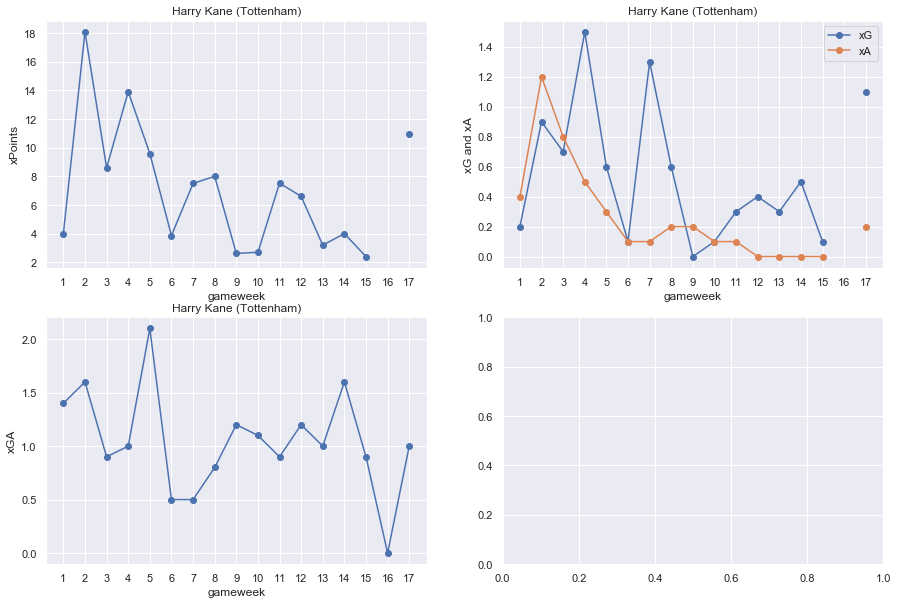

In [24]:
# find player index
name_string = 'Kane'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [21]:
# find player index
df[df['web_name'].str.contains('Souc')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,xPoints week 15,xG_week15,goals_week15,xGA_week15,cleansheet_week15,xA_week15,assists_week15,xPoints week 16,xG_week16,goals_week16,xGA_week16,cleansheet_week16,xA_week16,assists_week16,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
449,1,10,250,NaN,NaN,6,215439,NaN,NaN,0,0,2,-2,90.4,178,110,NaN,NaN,3,3,0.0,6.2,11,Tomas,6.2,21,5,96.1,27,16,False,373.8,28,9,1530,NaN,NaN,52,0,0,NaN,0,NaN,215439.jpg,4.5,0,0,Soucek,11.6,False,...,2.0,0.0,0.0,0.0,4.965299,0.1,1.0,1.8,0.0,0.1,0.0,2.332871,0.0,0.0,1.1,0.0,0.0,0.0,3.135335,0.2,0.0,2.0,0.0,0.0,0.0,8.301194,0.6,1.0,1.2,0.0,0.0,0.0,3.106531,0.1,0.0,0.5,1.0,0.0,0.0,5.316154,5.098717,NaN,4.435799,4.387985,0.823785,1.022337,0.980523,1.878519,5.1,0.298052


In [22]:
my_starting11 = [12,232,558,277,254,302,37,141,506,202,388]
my_subs = [213,449,200,146]

In [23]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,50,15.090909,5.5,4.616855,5.496461,4.894301,4.618199,4.695174,2.064720
232,Chilwell,Chelsea,61,14.038462,5.2,4.335437,3.199193,4.347716,NaN,4.438716,1.755367
558,Coufal,West Ham,47,13.000000,4.0,3.937224,4.550844,4.169887,NaN,4.090274,1.816106
277,Cancelo,Manchester City,57,11.000000,5.0,5.067295,5.789293,5.084543,5.005292,5.461494,2.122456
254,Salah,Liverpool,126,16.025641,7.8,6.602708,5.052959,6.254605,NaN,6.448538,1.860102
302,Fernandes,Manchester Utd,113,16.049383,8.1,7.151348,8.566375,8.427104,7.258865,7.088885,2.127398
37,Grealish,Aston Villa,77,14.923077,6.5,5.798113,6.008782,5.310273,5.546386,5.562031,2.089495
141,Zaha,Crystal Palace,74,15.084746,5.9,5.060820,3.252354,4.277493,4.725176,4.828628,1.860395
506,Wilson,Newcastle Utd,65,14.098361,6.1,5.443957,4.476606,4.199506,5.557104,5.626444,2.135296



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,46,17.073171,4.1,3.346380,3.788300,3.964188,NaN,3.463724,1.560258
449,Soucek,West Ham,52,17.111111,4.5,4.283682,5.316154,5.098717,NaN,4.435799,1.878519
200,Dallas,Leeds United,48,16.904762,4.2,2.908168,3.880083,3.470079,NaN,2.963068,1.327391
146,Mitchell,Crystal Palace,39,7.931034,2.9,2.691315,3.780774,3.780774,2.603407,2.746787,1.362800


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)